In [1]:
%matplotlib inline

In [49]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import textwrap

In [56]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
import plotly.express as px

In [73]:
from matplotlib.ticker import MaxNLocator

In [74]:
# Import our data into pandas from CSV
happy_reports = "Resources/clean_data/data_country_all.csv"
happy_reports_df = pd.read_csv(happy_reports)

happy_reports_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,3.6
1,2016,Switzerland,Western Europe,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,3.6
2,2017,Switzerland,Western Europe,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,3.6
3,2018,Switzerland,Western Europe,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2.276716,3.6
4,2019,Switzerland,Western Europe,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2.276716,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Trinidad & Tobago,Sub-Saharan Africa,39,6.192,1.23100,1.477000,0.713000,0.489000,0.016000,0.185000,0.554633,15.4
778,2018,Northern Cyprus,Sub-Saharan Africa,58,5.835,1.22900,1.211000,0.909000,0.495000,0.154000,0.179000,0.554633,24.4
779,2019,Northern Cyprus,Sub-Saharan Africa,64,5.718,1.26300,1.252000,1.042000,0.417000,0.162000,0.191000,0.554633,24.4
780,2019,North Macedonia,Sub-Saharan Africa,84,5.274,0.98300,1.294000,0.838000,0.345000,0.034000,0.185000,0.554633,16.8


In [75]:
# Sort based upon multiple columns
year_happiness_rank_df = happy_reports_df.sort_values(
    by=["Year", "Happiness Rank"], 
    ascending=True
)
year_happiness_rank_df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3.6
5,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3.2
10,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.2
15,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.8
20,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,6.8


Text(0.5, 1.0, 'Top 20 happiest countries')

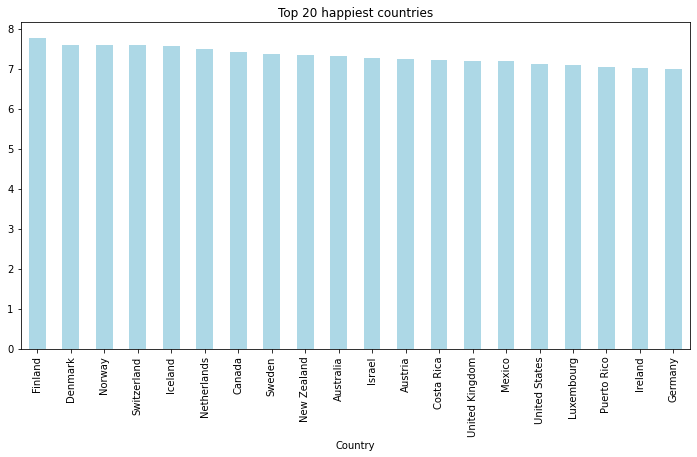

In [87]:
happy_reports_df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6),color='lightblue')
plt.title('Top 20 happiest countries')

Text(0.5, 1.0, 'Top 20 happiest countries')

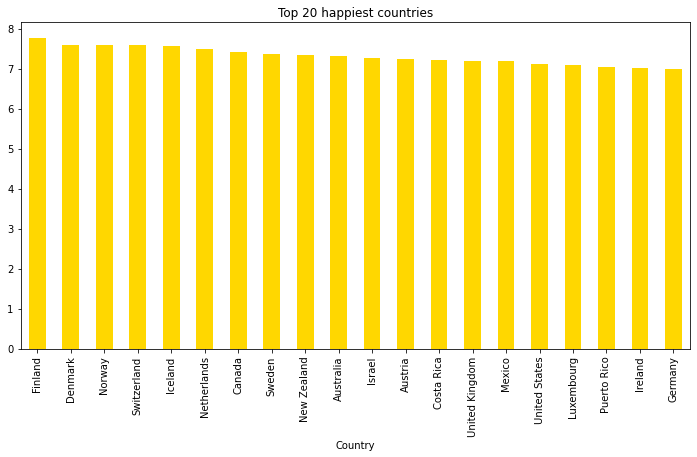

In [77]:
year_happiness_rank_df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,6),color='gold')
plt.title('Top 20 happiest countries')

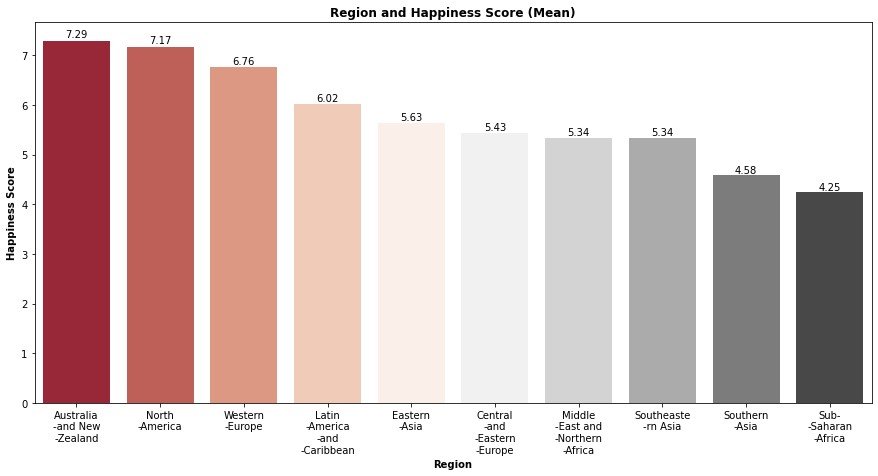

In [108]:
region_mean = happy_reports_df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plot = sns.barplot(x=region_mean.index, y=region_mean, ax=ax, palette=sns.color_palette("RdGy", len(region_mean)))
i = 0
for index, row in region_mean.iteritems():
    plot.text(x=i, y=row*1.01, s=round(row, 2), 
            ha='center', color='black')
    i += 1

ax.set_title('Region and Happiness Score (Mean)', fontdict={'fontweight':'bold'})
ax.set_xlabel('Region', fontweight='bold')
ax.set_ylabel('Happiness Score', fontweight='bold')
ax.set_xticklabels(textwrap.fill(x.get_text(), 10, subsequent_indent='-') for x in ax.get_xticklabels())
plt.show()

In [79]:
# px.scatter(data_frame = happy_reports_df,
#            x = 'Economy (GDP per Capita)', 
#            y = 'Happiness Score', 
#            animation_frame = 'Year',
#            animation_group = 'Country',
#            size = 'Happiness Score', 
#            color = 'Country', 
#            hover_name = 'Happines Rank', 
#            title = 'Happiness Scores vs Economy (GDP per Capita)')

In [110]:
# World map for happiness score over the years
# fig = px.choropleth(data_frame = happy_reports_df, 
#                     locations = 'Country',
#                     locationmode = 'country names',
#                     animation_frame ='Year',
#                     color = 'Happiness Score',
#                     hover_name = 'Country',
#                     color_continuous_scale = px.colors.sequential.Plasma)
# fig.show()

SyntaxError: invalid syntax (<ipython-input-110-0fa9876ad785>, line 1)

In [81]:
# Gloabal changes of happiness factors over the years 
columns = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
year_mean = happy_reports_df.groupby(by=['Year'])[columns].mean()
year_mean

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Year,,,,,,
2015,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
2016,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
2017,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883
2018,0.891449,1.213237,0.597346,0.454506,0.113362,0.181006
2019,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846


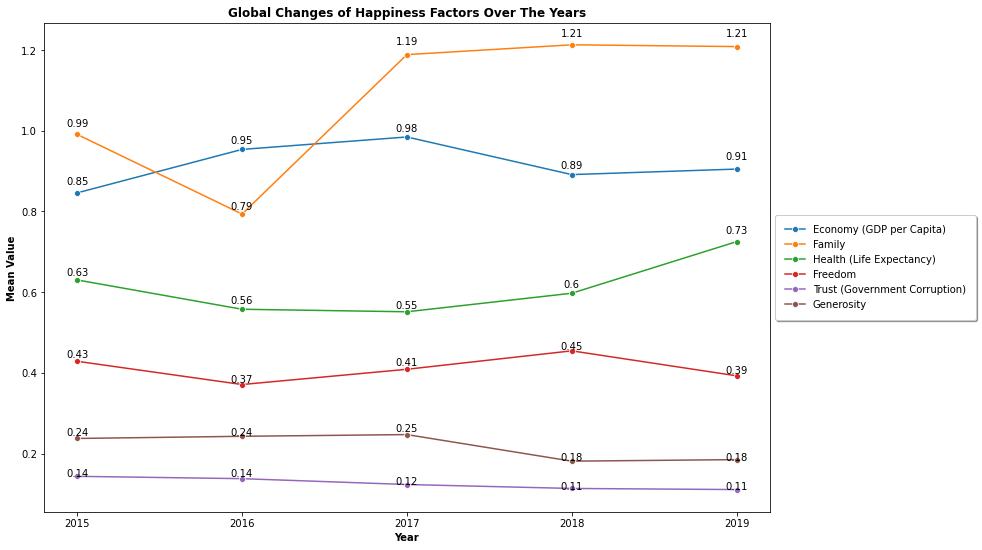

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(13, 9))
for column in columns:
    plot = sns.lineplot(x=year_mean.index, y=year_mean[column], ax=ax, 
               label=column, marker='o')

    for index, value in year_mean[column].iteritems():
        plot.text(x=index, y=round(value, 2)*1.02, s=round(value, 2), 
                  ha='center', color='black')

ax.set_title('Global Changes of Happiness Factors Over The Years', fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Mean Value', fontweight='bold')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, 
          loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(False)
plt.show()

In [92]:
# #create a horizontal clustered bar chart
# happy_reports_df.pivot(index = 'Region', columns = 'columns', values = 'Happiness Factors').plot(kind='barh', figsize=(15, 8))

# plt.xlabel("Region")
# plt.ylabel("Happiness Factors")
# plt.title("World Happiness Factors")
# plt.legend(loc="upper right")
# plt.show()

In [99]:
#fig, ax = plt.subplots(figsize=(12, 8))
# x = np.arange(len(happy_reports_df.columns()))
# bar_width = 0.4
# b1 = ax.bar(x, happy_reports_df.loc[happy_reports_df['columns'] == 'Economy (GDP per Capita)', 'count'],
#             width=bar_width)
# b2 = ax.bar(x + bar_width, happy_reports_df.loc[df['factors'] == 'Family', 'count'],
#             width=bar_width)

# # Fix the x-axes.
# ax.set_xticks(x + bar_width / 2)
# ax.set_xticklabels(happy_reports_df.columns())

In [109]:
#create a horizontal clustered bar chart
#selection = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# happiness_factors = happy_reports_df[happy_reports_df['Region'].isin(columns)]

# sns.catplot(data=happiness_factors, x='columns', y='Region',kind='bar', hue='Region', hue_order=columns)


In [32]:
# #create a grid of 6 plots
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(42, 25),
#                          sharey='row', sharex='row')

# #('Region')['Economy (GDP per Capita)']
# # plot at 1st row, 1st col and 1st position
# axes[0, 0].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Economy (GDP per Capita)']) 
# axes[0, 0].set_xlabel('Region')
# axes[0, 0].set_ylabel('Economy (GDP per Capita)')

# # plot at 1st row, 2st col and 2st position
# axes[0, 1].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Family'])
# axes[0, 1].set_xlabel('Region')
# axes[0, 1].set_ylabel('Family')

# # plot at 2nd row, 1st col and 1st position
# axes[1, 0].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Health (Life Expectancy)'])
# axes[1, 0].set_xlabel('Region')
# axes[1, 0].set_ylabel('Health (Life Expectancy)')

# # plot at 2nd row, 2nd col and 2nd position
# axes[1, 1].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Freedom'])
# axes[1, 1].set_xlabel('Region')
# axes[1, 1].set_ylabel('Freedom')

# # plot at 3rd row, 1st col and 1st position
# axes[2, 0].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Trust (Government Corruption)'])
# axes[2, 0].set_xlabel('Region')
# axes[2, 0].set_ylabel('Trust (Government Corruption)')

# # plot at 3rd row, 2nd col and 2nd position
# axes[2, 1].scatter(x=happy_reports_df['Region'],y=happy_reports_df['Generosity'])
# axes[2, 1].set_xlabel('Region')
# axes[2, 1].set_ylabel('Generosity')


# plt.show()

In [ ]:
ax = plt.subplots(1, 1, figsize=(13, 9))
multi